In [3]:
import pandas as pd
import numpy as np
import verispy, os
from verispy import VERIS

[Source for VERISPY + Useful README](https://github.com/RiskLens/verispy)

In [4]:
DATA_DIR ="./data/validated"
v = VERIS(json_dir=DATA_DIR,schema_url='https://raw.githubusercontent.com/vz-risk/VCDB/master/vcdb-merged.json' ,verbose=True)

vdf = v.json_to_df(keep_raw=True)
print(vdf.shape)

Found 8363 json files.
Loading schema


  1%|          | 73/8363 [00:00<00:11, 729.91it/s]

Loading JSON files to DataFrame.


  6%|▌         | 10/173 [00:00<00:01, 95.85it/s]

Finished loading JSON files to dataframe.
Building DataFrame with enumerations.
Building enumeration columns.


100%|██████████| 173/173 [00:10<00:00, 15.98it/s]


Done building DataFrame with enumerations.
Post-Processing DataFrame (A4 Names, Victim Industries, Patterns)
Finished building VERIS DataFrame
(8363, 2476)


##### v is a VERIS object. vdf contains the actual data. 

In [5]:
len(set(vdf['incident_id']))

8358

[Good StackOverflow Answer on working with Dataframes vvv](https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values)

          enum    x     n     freq
0          1.0  882  4711  0.18722
1          2.0   98  4711  0.02080
2       1000.0   57  4711  0.01210
3          3.0   50  4711  0.01061
4       2000.0   41  4711  0.00870
...        ...  ...   ...      ...
1734   26044.0    1  4711  0.00021
1735   67000.0    1  4711  0.00021
1736    1464.0    1  4711  0.00021
1737    1456.0    1  4711  0.00021
1738  385000.0    1  4711  0.00021

[1739 rows x 4 columns]
(4711, 2476)


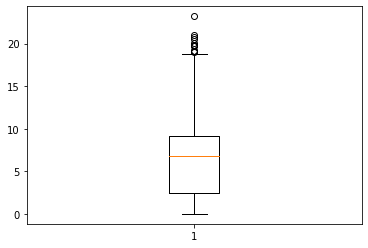

(array([980., 109., 138., 167., 214., 200., 320., 602., 516., 353., 261.,
        173., 129., 104., 102., 105.,  75.,  53.,  48.,  39.,  13.,   6.,
          3.,   0.,   1.]),
 array([ 0.        ,  0.9283269 ,  1.8566538 ,  2.7849807 ,  3.7133076 ,
         4.6416345 ,  5.5699614 ,  6.4982883 ,  7.4266152 ,  8.3549421 ,
         9.28326899, 10.21159589, 11.13992279, 12.06824969, 12.99657659,
        13.92490349, 14.85323039, 15.78155729, 16.70988419, 17.63821109,
        18.56653799, 19.49486489, 20.42319179, 21.35151869, 22.27984559,
        23.20817249]),
 <a list of 25 Patch objects>)

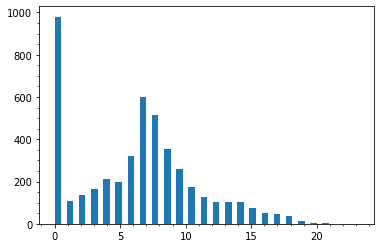

In [6]:
import matplotlib.pyplot as plt

vdf.rename(columns={'attribute.confidentiality.data_total': 'records_lost'}, inplace=True)
vdf
vdf_loss = vdf.dropna(subset=["records_lost"])
vdf_loss['records_lost']
print(v.enum_summary(vdf_loss, 'records_lost'))
plt.boxplot(np.log(vdf_loss["records_lost"]))
print(vdf_loss.shape)
plt.show()
plt.minorticks_on()
plt.hist(np.log(vdf_loss["records_lost"]), bins = 25, align='mid', width=.5)
    

Total Records Breached, Log Normalized

In [10]:
vdf_final = vdf_loss.join(v.raw_df['victim.employee_count'])
vdf_final

,action.Environmental,action.Error,action.Hacking,action.Malware,action.Misuse,action.Physical,action.Social,action.Unknown,action.environmental.notes,action.environmental.variety.Deterioration,...,victim.revenue.iso_currency_code.YER,victim.revenue.iso_currency_code.ZAR,victim.revenue.iso_currency_code.ZMK,victim.revenue.iso_currency_code.ZWD,victim.secondary.amount,victim.secondary.notes,victim.secondary.victim_id,victim.state,victim.victim_id,victim.employee_count
1,False,True,False,False,False,False,False,False,NaN,False,...,False,False,False,False,NaN,NaN,NaN,NaN,British Columbia Ministry of Finance,Large
4,False,False,True,False,False,False,False,False,NaN,False,...,False,False,False,False,NaN,NaN,NaN,NaN,Loyalist Certification Services Exams,1001 to 10000
7,False,True,False,False,False,False,False,False,NaN,False,...,False,False,False,False,NaN,NaN,NaN,WV,United States Department of Veterans Affairs,Over 100000
9,False,True,False,False,False,False,False,False,NaN,False,...,False,False,False,False,NaN,NaN,NaN,MO,United States Department of Veterans Affairs,Over 100000
11,False,False,False,False,False,True,False,False,NaN,False,...,False,False,False,False,NaN,NaN,NaN,KS,Occupational Health Partners,11 to 100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8353,False,False,False,False,True,False,False,False,NaN,False,...,False,False,False,False,NaN,NaN,NaN,OH,University Hospitals Elyria Medical Center,1001 to 10000
8354,False,False,False,False,True,False,False,False,NaN,False,...,False,False,False,False,NaN,NaN,NaN,NaN,Heartland Regional Health Authority,1001 to 10000
8356,False,False,False,False,False,True,False,False,NaN,False,...,False,False,False,False,NaN,NaN,NaN,CA,John E Gonzalez,Small
8359,False,False,False,False,False,True,False,False,NaN,False,...,False,False,False,False,NaN,NaN,NaN,LA,Pousson Family Dentistry,Unknown


In [11]:
def assign_bugs(row):
    return row['action.Malware'] | row['action.Hacking']
        
vdf_final['action.Bugs'] = vdf_final.apply(assign_bugs, axis=1)

In [12]:
vdf_final

,action.Environmental,action.Error,action.Hacking,action.Malware,action.Misuse,action.Physical,action.Social,action.Unknown,action.environmental.notes,action.environmental.variety.Deterioration,...,victim.revenue.iso_currency_code.ZAR,victim.revenue.iso_currency_code.ZMK,victim.revenue.iso_currency_code.ZWD,victim.secondary.amount,victim.secondary.notes,victim.secondary.victim_id,victim.state,victim.victim_id,victim.employee_count,action.Bugs
1,False,True,False,False,False,False,False,False,NaN,False,...,False,False,False,NaN,NaN,NaN,NaN,British Columbia Ministry of Finance,Large,False
4,False,False,True,False,False,False,False,False,NaN,False,...,False,False,False,NaN,NaN,NaN,NaN,Loyalist Certification Services Exams,1001 to 10000,True
7,False,True,False,False,False,False,False,False,NaN,False,...,False,False,False,NaN,NaN,NaN,WV,United States Department of Veterans Affairs,Over 100000,False
9,False,True,False,False,False,False,False,False,NaN,False,...,False,False,False,NaN,NaN,NaN,MO,United States Department of Veterans Affairs,Over 100000,False
11,False,False,False,False,False,True,False,False,NaN,False,...,False,False,False,NaN,NaN,NaN,KS,Occupational Health Partners,11 to 100,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8353,False,False,False,False,True,False,False,False,NaN,False,...,False,False,False,NaN,NaN,NaN,OH,University Hospitals Elyria Medical Center,1001 to 10000,False
8354,False,False,False,False,True,False,False,False,NaN,False,...,False,False,False,NaN,NaN,NaN,NaN,Heartland Regional Health Authority,1001 to 10000,False
8356,False,False,False,False,False,True,False,False,NaN,False,...,False,False,False,NaN,NaN,NaN,CA,John E Gonzalez,Small,False
8359,False,False,False,False,False,True,False,False,NaN,False,...,False,False,False,NaN,NaN,NaN,LA,Pousson Family Dentistry,Unknown,False


In [13]:
import numpy as np
import pandas as pd
import logging
import dowhy
from dowhy.do_why import CausalModel
import graphviz
import dowhy.datasets, dowhy.plotter 

In [14]:
import sys
print(sys.version)

3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


In [15]:
# Create causal model with instrumental
print(vdf_final['records_lost'])

model = CausalModel(
    data = vdf_final,
    treatment = 'action.Bugs',
    outcome = 'records_lost',
    common_causes = ['action.Environmental', 'action.Error', 'action.Misuse', 'action.Physical', 'action.Social'],
    instruments = ['action.Hacking', 'action.Malware'],
    logging_level = logging.INFO
)
model.view_model(layout="dot")

INFO:dowhy.do_why:Model to find the causal effect of treatment ['action.Bugs'] on outcome ['records_lost']


1          23.0
4         202.0
7           1.0
9           1.0
11       1105.0
         ...   
8353      297.0
8354      833.0
8356     1025.0
8359     1400.0
8360    20000.0
Name: records_lost, Length: 4711, dtype: float64


In [16]:
model.view_model()

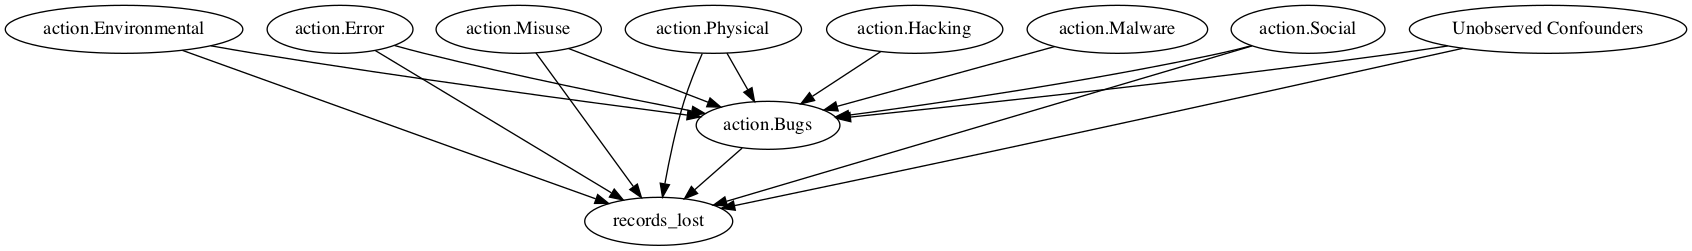

In [17]:
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

We get a causal graph. Now identification and estimation is done. 

In [18]:
identified_estimand = model.identify_effect()
print(identified_estimand)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['action.Misuse', 'action.Social', 'action.Environmental', 'action.Physical', 'action.Error', 'U']


WARN: Do you want to continue by ignoring these unobserved confounders? [y/n] y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:['action.Hacking', 'action.Malware']


Estimand type: ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
────────────(Expectation(records_lost|action.Misuse,action.Social,action.Envir
daction.Bugs                                                                  

                                       
onmental,action.Physical,action.Error))
                                       
Estimand assumption 1, Unconfoundedness: If U→action.Bugs and U→records_lost then P(records_lost|action.Bugs,action.Misuse,action.Social,action.Environmental,action.Physical,action.Error,U) = P(records_lost|action.Bugs,action.Misuse,action.Social,action.Environmental,action.Physical,action.Error)
### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(records_lost, action.Hacking)/Derivative(action.Bugs, a
ction.Hacking))
Estimand assumption 1, As-if-random: If U→→records_lost then ¬(U →→action.Hacking,action.Malware)
Estimand assum

In [19]:
estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression")
print("Causal Estimate is " + str(estimate.value))

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: records_lost~action.Bugs+action.Misuse+action.Social+action.Environmental+action.Physical+action.Error


Causal Estimate is 23069960.930878498


In [20]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['action.Misuse', 'action.Social', 'action.Environmental', 'action.Physical', 'action.Error', 'U']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:['action.Hacking', 'action.Malware']


Estimand type: ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
────────────(Expectation(records_lost|action.Misuse,action.Social,action.Envir
daction.Bugs                                                                  

                                       
onmental,action.Physical,action.Error))
                                       
Estimand assumption 1, Unconfoundedness: If U→action.Bugs and U→records_lost then P(records_lost|action.Bugs,action.Misuse,action.Social,action.Environmental,action.Physical,action.Error,U) = P(records_lost|action.Bugs,action.Misuse,action.Social,action.Environmental,action.Physical,action.Error)
### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(records_lost, action.Hacking)/Derivative(action.Bugs, a
ction.Hacking))
Estimand assumption 1, As-if-random: If U→→records_lost then ¬(U →→action.Hacking,action.Malware)
Estimand assum

## Method 1: Stratification

In [21]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification")
print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: records_lost~action.Bugs+action.Misuse+action.Social+action.Environmental+action.Physical+action.Error


*** Causal Estimate ***

## Target estimand
Estimand type: ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
────────────(Expectation(records_lost|action.Misuse,action.Social,action.Envir
daction.Bugs                                                                  

                                       
onmental,action.Physical,action.Error))
                                       
Estimand assumption 1, Unconfoundedness: If U→action.Bugs and U→records_lost then P(records_lost|action.Bugs,action.Misuse,action.Social,action.Environmental,action.Physical,action.Error,U) = P(records_lost|action.Bugs,action.Misuse,action.Social,action.Environmental,action.Physical,action.Error)
### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(records_lost, action.Hacking)/Derivative(action.Bugs, a
ction.Hacking))
Estimand assumption 1, As-if-random: If U→→records_lost then ¬(U →→a

/Users/ethanpaek/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Method 2: Matching

In [22]:
causal_estimate_match = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_matching")
print(causal_estimate_match)
print("Causal Estimate is " + str(causal_estimate_match.value))

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Matching Estimator
INFO:dowhy.causal_estimator:b: records_lost~action.Bugs+action.Misuse+action.Social+action.Environmental+action.Physical+action.Error
/Users/ethanpaek/opt/anaconda3/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:51: FutureWarning: `item` has been deprecated and will be removed in a future version
  control_outcome = control.iloc[indices[i]][self._outcome_name].item()


*** Causal Estimate ***

## Target estimand
Estimand type: ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
────────────(Expectation(records_lost|action.Misuse,action.Social,action.Envir
daction.Bugs                                                                  

                                       
onmental,action.Physical,action.Error))
                                       
Estimand assumption 1, Unconfoundedness: If U→action.Bugs and U→records_lost then P(records_lost|action.Bugs,action.Misuse,action.Social,action.Environmental,action.Physical,action.Error,U) = P(records_lost|action.Bugs,action.Misuse,action.Social,action.Environmental,action.Physical,action.Error)
### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(records_lost, action.Hacking)/Derivative(action.Bugs, a
ction.Hacking))
Estimand assumption 1, As-if-random: If U→→records_lost then ¬(U →→a